In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


nta_cleaned = pd.read_csv("data/nta_fine_stats_cleaned.csv")
geo_merged = gpd.read_file("data/nta_with_fine_stats.geojson")
df = pd.read_csv("full_geocoded_parking_fines.csv", low_memory=False)

# Remove NTAs with zero or very small population (threshold = 1000)
nta_cleaned = nta_cleaned[nta_cleaned['Population'] >= 1000]

# --- Basic Statistics ---
print("Summary statistics:\n")
print(nta_cleaned.describe())



Summary statistics:

         num_fines     Population  fines_per_1000
count   214.000000     214.000000      214.000000
mean    599.135514   85388.238318        7.472230
std     510.638591   58528.915401        5.417663
min       1.000000    2727.000000        0.110479
25%     190.250000   42644.000000        3.674291
50%     477.000000   74940.000000        6.417022
75%     825.500000  114246.750000        9.635464
max    2226.000000  331906.000000       31.272267


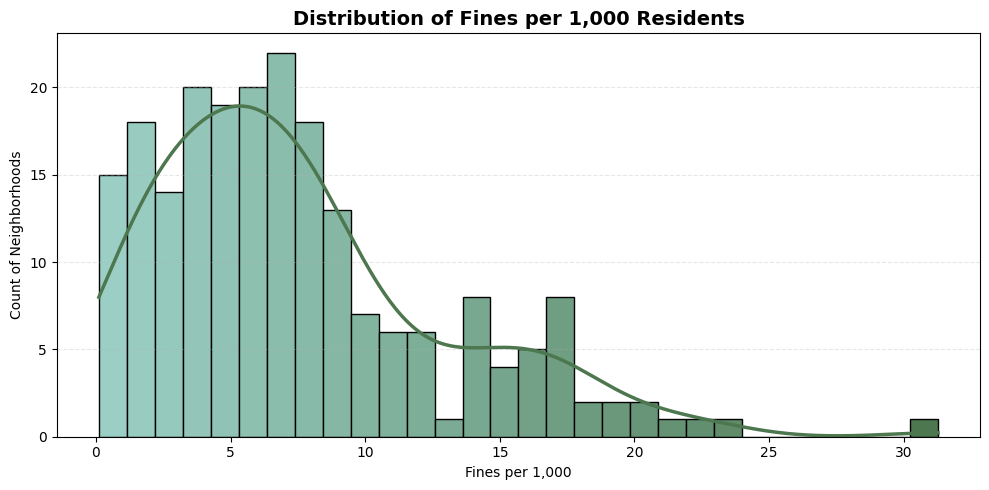

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import seaborn as sns
from matplotlib import cm
from scipy.stats import gaussian_kde

# NYC gradient colors: Liberty Copper → Central Green → Empire Sky
nyc_cmap = mcolors.LinearSegmentedColormap.from_list(
    "nyc_gradient", ["#9BCFC5", "#4D774E"]
)

# Histogram data
values = nta_cleaned['fines_per_1000']
counts, bins = np.histogram(values, bins=30)

# Gradient coloring
norm = mcolors.Normalize(vmin=0, vmax=len(counts))
colors = nyc_cmap(np.linspace(0, 1, len(counts)))

# Plot histogram
fig, ax = plt.subplots(figsize=(10, 5))
for i in range(len(counts)):
    ax.bar(bins[i], counts[i], width=bins[i+1] - bins[i],
           color=colors[i], edgecolor='black', align='edge')

# Add KDE curve
kde = gaussian_kde(values)
x_vals = np.linspace(values.min(), values.max(), 500)
kde_vals = kde(x_vals)
ax.plot(x_vals, kde_vals * len(values) * (bins[1] - bins[0]), color='#4D774E', linewidth=2.5)

# Style
ax.set_title("Distribution of Fines per 1,000 Residents", fontsize=14, fontweight='bold')
ax.set_xlabel("Fines per 1,000")
ax.set_ylabel("Count of Neighborhoods")
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


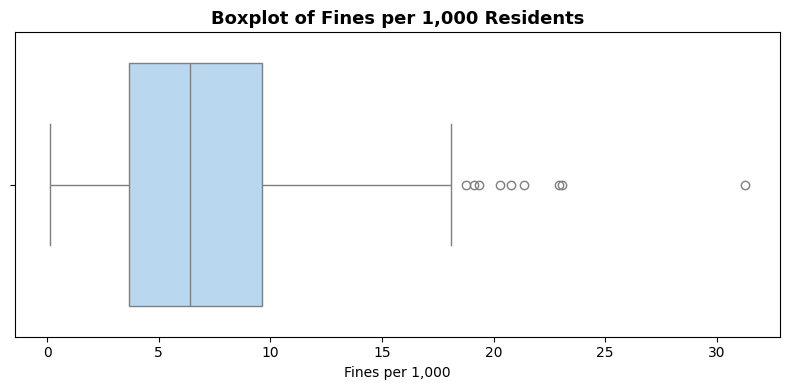

In [47]:

plt.figure(figsize=(8, 4))
sns.boxplot(x=nta_cleaned['fines_per_1000'], color='#B0D9F8')  # Empire Sky
plt.title("Boxplot of Fines per 1,000 Residents", fontsize=13, fontweight='bold')
plt.xlabel("Fines per 1,000")
plt.tight_layout()
plt.show()


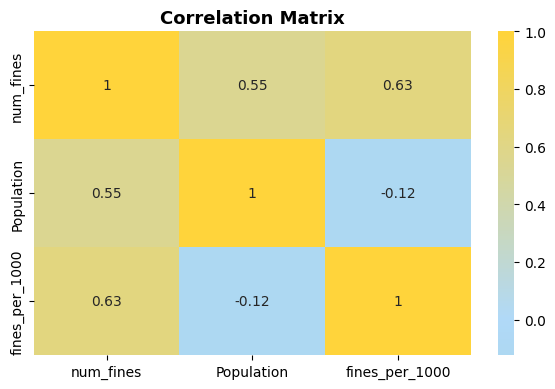

In [53]:
from matplotlib.colors import LinearSegmentedColormap

# Create a smooth NYC-inspired colormap
nyc_cmap = LinearSegmentedColormap.from_list(
    "nyc_gradient",
    ["#9BCFC5", "#B0D9F8", "#FFD43B"],  # Liberty Copper → Empire Sky → Taxi Yellow
    N=256
)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    nta_cleaned[['num_fines', 'Population', 'fines_per_1000']].corr(),
    annot=True,
    cmap=nyc_cmap,
    center=0
)
plt.title("Correlation Matrix", fontsize=13, fontweight="bold")
plt.tight_layout()
plt.show()


/var/folders/0q/x2dyyz5d7xs7zzrfhj8l86840000gp/T/ipykernel_41804/2414837044.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_violations, x='Count', y='Violation Type', palette=nyc_colors)


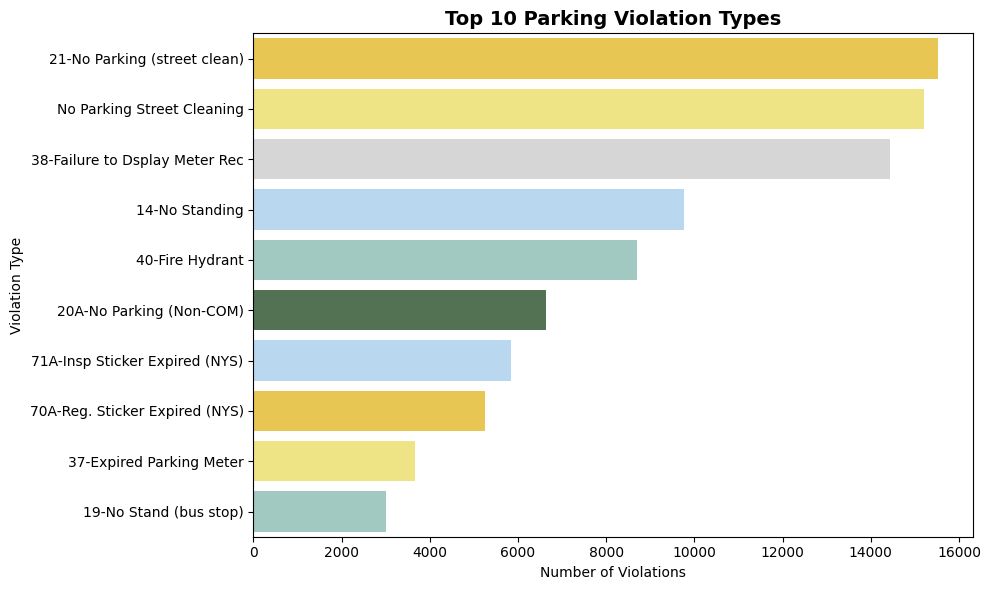

In [65]:

# Define NYC-inspired color palette
nyc_colors = [
    "#FFD43B",  # Taxi Yellow
    "#FFF275",  # Broadway Lights
    "#D6D6D6",  # Chrysler Chrome
    "#B0D9F8",  # Empire Sky
    "#9BCFC5",  # Liberty Copper
    "#4D774E",  # Central Green
    "#B0D9F8",
    "#FFD43B",
    "#FFF275",
    "#9BCFC5"
]
# Get top 10 violations
top_violations = df['violation_description'].value_counts().head(10).reset_index()
top_violations.columns = ['Violation Type', 'Count']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_violations, x='Count', y='Violation Type', palette=nyc_colors)
plt.title("Top 10 Parking Violation Types", fontsize=14, fontweight="bold")
plt.xlabel("Number of Violations")
plt.legend([], [], frameon=False) 
plt.ylabel("Violation Type")
plt.tight_layout()
plt.show()


/var/folders/0q/x2dyyz5d7xs7zzrfhj8l86840000gp/T/ipykernel_41804/1895241487.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='fines_per_1000', y='ntaname', palette=nyc_colors)


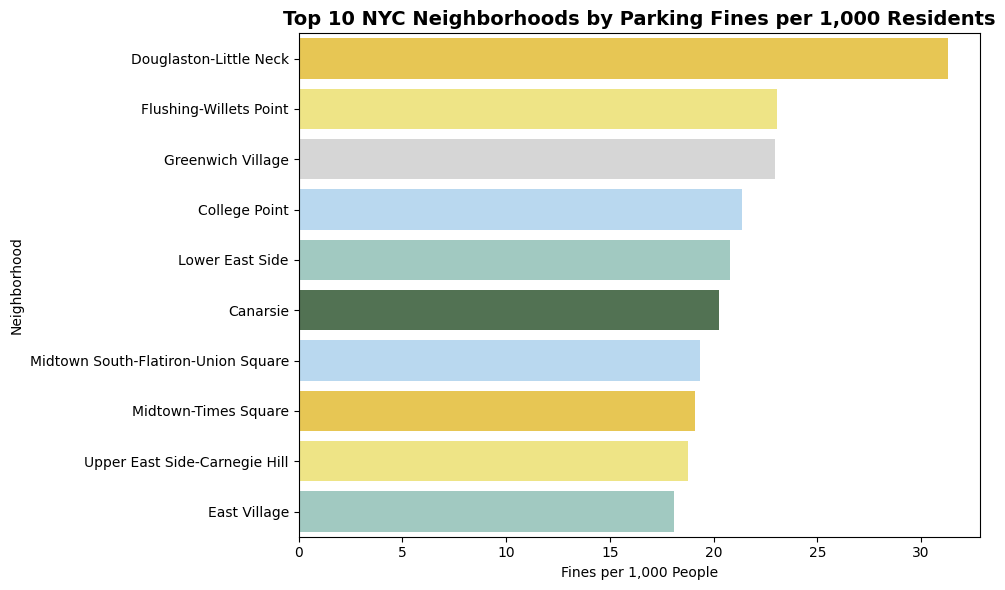

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# NYC color palette (10 distinct shades)
nyc_colors = [
    "#FFD43B",  # Taxi Yellow
    "#FFF275",  # Broadway Lights
    "#D6D6D6",  # Chrysler Chrome
    "#B0D9F8",  # Empire Sky
    "#9BCFC5",  # Liberty Copper
    "#4D774E",  # Central Green
    "#B0D9F8",  # Extra shades to match 10
    "#FFD43B",
    "#FFF275",
    "#9BCFC5"
]

# Take top 10 fined neighborhoods
top10 = nta_cleaned.sort_values("fines_per_1000", ascending=False).head(10)

# Plot with custom palette
plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x='fines_per_1000', y='ntaname', palette=nyc_colors)
plt.title("Top 10 NYC Neighborhoods by Parking Fines per 1,000 Residents", fontsize=14, fontweight='bold')
plt.xlabel("Fines per 1,000 People")
plt.ylabel("Neighborhood")
plt.tight_layout()

# Save the plot in output directory
plt.savefig("output/top_10_neighborhoods_fines_per_1000.png", dpi=300, bbox_inches='tight')

plt.show()


In [61]:
import folium
import geopandas as gpd
from folium.features import GeoJsonTooltip
import branca.colormap as cm

# Cap fines at 85th percentile
vmax_cap = geo_merged['fines_per_1000'].quantile(0.85)
geo_merged['fines_per_1000_capped'] = geo_merged['fines_per_1000'].clip(upper=vmax_cap).fillna(0)

# Define NYC-inspired gradient color map
nyc_colormap = cm.LinearColormap(
    colors=["#FFD43B", "#FFF275", "#B0D9F8", "#9BCFC5", "#4D774E"],  # NYC palette
    vmin=0, vmax=vmax_cap
)

# Create map
nyc_center = [40.7128, -74.0060]
m = folium.Map(location=nyc_center, zoom_start=10, tiles='CartoDB positron')

# Add custom colored GeoJson
folium.GeoJson(
    geo_merged,
    style_function=lambda feature: {
        'fillColor': nyc_colormap(feature['properties']['fines_per_1000_capped']),
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.7,
    },
    tooltip=GeoJsonTooltip(
        fields=["ntaname", "fines_per_1000"],
        aliases=["Neighborhood", "Fines per 1,000 residents"],
        localize=True,
        sticky=False,
        labels=True
    )
).add_to(m)

# Add NYC-themed legend
nyc_colormap.caption = "Parking Fines per 1,000 Residents (Capped)"
nyc_colormap.add_to(m)

# Display map
m.save("output/parking_fines_map.html")
m
